<a href="https://colab.research.google.com/github/shivraj7/scalar/blob/main/Copy_of_Revision_notes_11_Probability_Distributions_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color='red'>**Disclaimer: Please note that any topics that are not covered in today’s lecture will be covered in the next lecture**.</font>

## <font color='blue'>Content</font>
  

- **Exponential Distribution**
- **Box-cox transformation**

- **Geometric Distribution**
  - Mean of Geometric Distribution



> <font color='purple'>Importing Libraries</font>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import poisson, expon, geom

## <font color='blue'>**Exponential Distribution**

### <font color='purple'>**Example: You receive 240 messages per hour on average - assume Poisson distributed. Rate of messages arriving per second is $\frac{1}{15}.$**</font>

> <font color='purple'>**Q1) What is the probability of having no message in 10 seconds?**</font>

In this case, we are looking for the probability of k = 0 events (zero messages) in a Poisson distribution.

average rate of messages arriving in 10 seconds will be

### **Using Poisson Distribution**


In [ ]:
rate = 10*240/3600 # this is 10 * (lambda) = 10 * 1/15 only

poisson.pmf(k=0, mu=10/15)

0.513417119032592

<font color='purple'>**Let's calculate this using poisson distribution formula**</font>  

We know the formula for poisson distribution is  

- $P[X=k] = \Large \frac{λ^k \ * \  e^{-λ}}{k!}$   


for $P[X=0]$, poisson will be  

- = $\Large \frac{λ^0 \ * \ e^{-10λ}}{0!}$ = $e^{-10λ}$  


**Note**:    
- $λ$ is rate per second.  
- $10λ$ is rate per 10 seconds.


Now let's focus on the next question for the moment. Let me know what will be the answer of that question


> <font color='purple'>**Q2. What is the probability of waiting for more than 10 seconds for the next message?**</font>  


If you can see this question and above question is exact same.  

In above question we calculated no messages in 10 seconds which also means waiting for more than 10 seconds to get message.  

So,
- Let T -> denote time to wait for next message

> <font color='purple'>Is T is discrete or continuous?</font> -> **continuous**    

We can represent this as $P[T>10]$, answer will be same as above

- $P[T>10] = \Large e^{-10λ}$  


<br>

What if I ask,  

> <font color='purple'>**Q3. What is the probability of waiting less than or equal to 10 seconds?**</font>  
  
We can represent it as $P[T≤10]$

It is complement of $P[T>10]$, so to find this we can simply subtract it from 1.    

So,  

- $P[T≤10] = \Large 1 - e^{-10λ}$  


**This equation is known as exponential equation**, we just derive the formula by solving some questions.  

<br>  

<font color='purple'>***Generic equation is***</font>,  


**$P[T ≤ x] = 1 - e^{-λx}$**

Or  

If a random variable $X$ follows an exponential distribution, then the **cumulative distribution function (CDF)** of X can be written as:  

**$\Large f(x; \lambda) =  1 - e^{-λx}$**


Where,

- $λ$ is rate parameter.
- $e$ is a constant roughly equal to 2.718




<br>

The **probability density function (PDF)** of exponential distribution is given by,  

$\Large f(x; \lambda) =  λ e^{-λx}$

<br>

Reciprocal of the rate parameter is referred as **scale** which is calculated as  $(1/λ)$

#### <font color='purple'>**Scale Parameter**</font>

In exponential distribution the scale parameter is refered as $β$.   

Where,  

- $β$ = $1/λ$     

So,

Exponential distribution is also written as,

**$\Large f(x;\lambda) = 1 - e^\frac{-x}{β}$**  

<br>

Solving question number 2 and 3 using **expon()** function



In [ ]:
# Q2) P[T > 10], scale = 1/rate = 1/(1/15) = 15
1- expon.cdf(x=10, scale=15)

0.513417119032592

In [ ]:
# Q3) P[T <= 10]
expon.cdf(x=10, scale=15)

0.486582880967408

### <font color='orange'>**Conclusion**</font>

Poisson Distribution:

- **Use Case:** Models the number of events in a fixed interval of time or space.  

- **Example Question:**   

  - "How many customers will enter a store in the next hour?"  
  - "How many messages will you receive in next 15 mins?"  
  - "How many calls can the call center expect in the next 30 minutes?"

- **Parameter:** Rate (λ) represents the average number of events in the specified interval.  

<br>

Exponential Distribution:

- **Use Case:** Models the time between consecutive events.  

- **Example Question:**   

  - "How long do I have to wait for the next message?"   
  - "On average, how much time will a customer spend waiting for service in a queue?"   
  - "How long, on average, will passengers wait between consecutive bus arrivals?"

- **Parameter:** Scale represents the average time between events. It's the reciprocal of the rate.  

- **Relation:** Rate and Scale are reciprocals; as one increases, the other decreases.

Now, let's solve some examples

## <font color='blue'>**Example: exponential distribution**</font>

```
You are working as a data engineer who has to resolve any bugs/
failures of machine learning models in production.
The time taken to debug is exponentially distributed with mean of 5 minutes  
```

> <font color='purple'>Mean of 5 mins: Is it a $λ$ or $β$, how to decide?</font>  

 1 bug is solved -> 5 mins. So how many bugs will be solved in 1 mins?  

- 1/5. This is nothing but the rate ($λ$) per minute.

Now, if $λ = 1/5$, $β = 1/λ = 5$

Here mean time is representing $β$ = 5.  

<br>  

> <font color='purple'>**Q1 Find the probability of debugging in 4 to 5 minutes**</font>  

We can represent it as $P[4 < x < 5]$, by using **expon.cdf()**, the probability will be  
    



In [ ]:
# P [4 < T < 5] = P [T <= 5] - P[T <= 4]
prob = expon.cdf(x=5, scale=5) - expon.cdf(x=4, scale=5)
prob

0.08144952294577923

> <font color='purple'>**Q2 Find the probability of needing more than 6 minutes to debug**</font>  

Here we want to find $P[x > 6]$

In [ ]:
prob = 1 - expon.cdf(x=6, scale=5)
prob

0.3011942119122022

> <font color='purple'>**Q3. Given that you have already spent 3 minutes, what is the probability of needing more than 9 minutes**</font>  

- It states that we have already spent 3 minutes trying to solve the bug and we want to find probability of needing total time more than 9 mins.  

We can represent it in this way: $P[T>9 | T>3]$  

Means, given that we have already 3 minutes, find the probability that it'll take more than 9 minutes.  

so,  

- $P[T>9 | T>3] = \Large \frac{P[(T>9)∩(T>3)]}{P[T>3 ]}$  

  $P[T>9 | T>3] = \Large \frac{P[T>9]}{P[T>3]}$

as if something is greater than 9 will be also greater than 3, so their intersection will return greater than 9 only.  

Now, by using expon.cdf() we can calculate the probability

In [ ]:
# P[T > 9 | T > 3]
prob = (1 - expon.cdf(x=9, scale=5))/(1 - expon.cdf(x=3, scale=5))
prob

0.30119421191220214

Now, by conventional formula we can write  

$\Large \frac{P[T>9]}{P[T>3]} = \frac{e^{-9λ}}{e^{-3λ}} = e^{-6λ}$  

and in the previous question, $P[T > 6] = e^{-6λ}$    

So, $P[T > 9 | T > 3] = P[T>6]$

Let's verify if we get the same answer for both the equation

In [ ]:
# P[T > 9 | T > 3]
prob_1 = (1 - expon.cdf(x=9, scale=5))/(1 - expon.cdf(x=3, scale=5))

# P[T>6]
prob_2 = 1-expon.cdf(x=6, scale=5)

print(prob_1, prob_2)

0.30119421191220214 0.3011942119122022


Both the values are same.  

This is known as <font color='purple'>**memoryless property**</font> of exponential distribution.  

- The fact that you took three minutes so far does not affect how much more you might take to debug

> **What is memoryless property?**

## <font color='blue'>**Memoryless property of the Exponential distribution:**</font>

- The memoryless property essentially means that the time you've already spent on an event doesn't affect the future waiting time.

  - In the context of the exponential distribution, it means that the probability of needing more time in the future is the same, regardless of how much time has already passed.

<br>

- For example, in the first question, we want to find the probability of needing more than 6 minutes to debug. Let's call this event A.   

- In the second question, we're interested in the probability of needing more than 9 minutes given that you've already spent 3 minutes, which we'll call event B.

  - The memoryless property tells us that the probability of event B, is the same as the probability of event A.

  - This is because the exponential distribution treats each moment as if you're starting anew, regardless of the past.

## <font color='blue'>**Box Cox transformation**</font>

Now, if you remember in the last lecture we saw about log normal distribution where we were transforming non normal data into normally distributed data using logarithm

> <font color='purple'>**Is there any other techniques which can transform non normally distributed data into normally distributed data?**</font>  

- In statistics, the **Box-Cox transformation is another technique which is used to stabilize the variance and make a dataset more closely approximate a normal distribution**.  

- It is particularly useful when dealing with data that has varying levels of spread and doesn't follow a normal distribution.  

<br>

**Formula for Box-Cox Transformation:**

The basic idea behind this method is <font color='purple'>to find best value for λ such that the transformed data is as close to normally distributed as possible</font>, using the following formula:


- $\Large Y(λ) =  \frac{Y^λ-1}{λ}$, if $λ \not= 0$  

  $\Large Y(λ) = ln(Y)$, if $λ = 0$

Here:

$Y(λ)$ is the transformed variable.  

$Y$ is the original variable.  

$λ$ is the transformation parameter.  

<br>  


> <font color='purple'>Q. How to find the optimal value of $λ$:</font>  

- The challenge is to find the best value for $λ$ that maximizes the normality of the transformed data.


There are some techniques to find optimal value of $λ$

1. **maximum liklehood estimation (MLE)**
2. **Grid Search**  
3. **Q-Q Plot**  
4. **Cross validation**

Commonly **MLE** is used to find the optimal $λ$ value.  

In **SciPy's boxcox function** also, the optimal λ value is found using a maximum likelihood estimation (**MLE**) approach.  

We will study this approach in later modules.




### <font color='blue'>**Example: Box cox transformation in python**</font>  


Suppose we generate a random set of 1,000 values that come from an exponential distribution:  






<ipython-input-1-a10f852b3520>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data, hist=False, kde=True)


<Axes: ylabel='Density'>

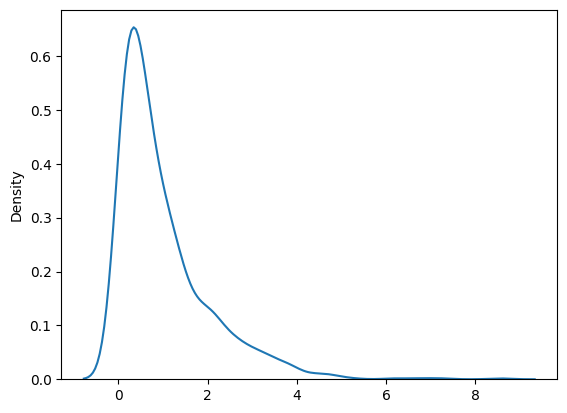

In [ ]:
import numpy as np
from scipy.stats import boxcox
import seaborn as sns

#make this example reproducible
np.random.seed(0)

#generate dataset
data = np.random.exponential(size=1000)

#plot the distribution of data values
sns.distplot(data, hist=False, kde=True)

<br>
<br>

We can use the **boxcox()** function to find an optimal value of lambda that produces a more normal distribution:

<ipython-input-2-c622ffd9e6b8>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(transformed_data, hist=False, kde=True)


<Axes: ylabel='Density'>

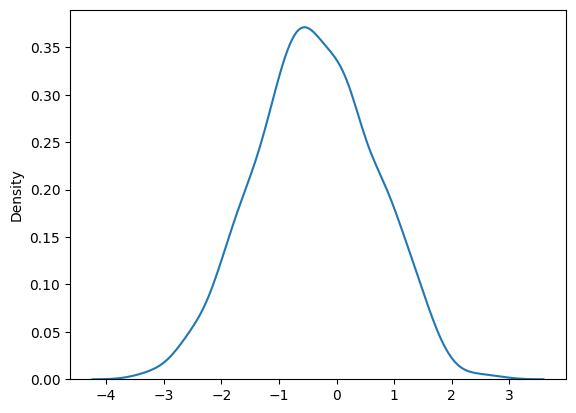

In [ ]:
#perform Box-Cox transformation on original data
transformed_data, best_lambda = boxcox(data)

#plot the distribution of the transformed data values
sns.distplot(transformed_data, hist=False, kde=True)


<br>
<br>



We can observe that the transformed data follows more of a normal distribution.

We can also find the exact lambda value which is used to perform the Box-Cox transformation:

In [ ]:
#display optimal lambda value
print(best_lambda)


0.2420131978174143


The optimal lambda was found to be roughly 0.242.

<font color='purple'>Thus, each data value was transformed using the following equation:</font>


$\Large Y(λ) =  \frac{Y^λ-1}{λ}$, if $λ \not= 0$

Putting the value of lambda in the equation,

Transformed_data = $\Large \frac{original \ ^{0.242} - 1}{0.242}$

We can confirm this by looking at the values from the original data compared to the transformed data:


In [ ]:
#view first five values of original dataset
data[0:5]

array([0.79587451, 1.25593076, 0.92322315, 0.78720115, 0.55104849])

In [ ]:
#view first five values of transformed dataset
transformed_data[0:5]

array([-0.22212062,  0.23427768, -0.07911706, -0.23247555, -0.55495228])

The first value in the original dataset was 0.79587. Thus, we applied the following formula to transform this value:

Transformed_data = $\Large \frac{0.79587^{0.242} – 1}{0.242}$ = $-0.222$  

We can confirm that the first value in the transformed dataset is indeed -0.222.

### <font color='purple'>Difference between box cox and log normal transformation.</font>

- Unlike the log transformation, <font color='purple'>the Box-Cox transformation is not limited to handling right-skewed data</font>.

- It is a family of power transformations, and by selecting an appropriate parameter (lambda), <font color='purple'>it can address both positively and negatively skewed data</font>.



## <font color='blue'>**Geometric Distribution**</font>

<font color='purple'>Scenario:</font>  

```
Imagine you're in a job search, and you're giving interviews until you land your first job.
```  

> <font color='purple'>**Q1. What are the possible outcomes in this situation?**</font>  

- Either you succeed (s) or fail (f) at each interview.  

Now,

<font color='purple'>Suppose you land a job in the first interview itself:</font>  
  - Outcome will be {s}  


<font color='purple'>What if you fail in your first interview, so you will give second interview and land a job in your 2nd interview</font>  

- Outcome will be {fs}   

<font color='purple'>What if you fail in your 2nd interview but land a job in 3rd interview</font>  

- Outcome will be {ffs}  

<br>  

As we mentioned, you will keep giving interviews till you land a job.  

So, The sample space for this situation is like a sequence of attempts will be  

- <font color='purple'>S = {s, fs, ffs, fffs, ...}</font>




Here, we'll use $X$ to represent the number of interviews, and <font color='purple'>$p$ is the success rate</font>, which is let's say **0.1**  

- So, **success will be $p$ and failure will be $1-p$**

<br>  
  
Now, let's find the probability of different values of X:  

- <font color='purple'>$P(X=1)$:  This is the probability of succeeding in the first interview</font>    
  - So $P(X=1) = p = 0.1$.
  
- <font color='purple'>$P(X=2)$: To get this, you'd fail in the first interview (1-p), then succeed in the second interview (p)</font>,   
  - So $P(X=2) = (1-p)*p = 0.9*0.1$.

- <font color='purple'>$P(X=3)$: Similarly, you'd fail twice ((1-p) * (1-p)) and then succeed (p)</font>  
  - So, $P(X=3) = (1-p)*(1-p)*p = 0.9^2 * 0.1$


It will keep going on for X=4, X=5 ...  



**Simplifying we have,**    

$P(X=1) = (0.9)^0*(0.1)$  
$P(X=2) = (0.9)^1*(0.1)$  
$P(X=3) = (0.9)^2*(0.1)$  
$P(X=4) = (0.9)^3*(0.1)$  

and so on..


<font color='purple'>We can see this pattern continues:</font>  
$P(X=k) = (0.9)^{k-1}*(0.1)$      

Replacing $0.9$ with $(1-p)$ and $0.1$ with $(p)$, we will get

- <font color='purple'>**$P(X=k) = (1-p)^{k-1}*p$**</font>  

<br>

This probability distribution is known as the Geometric Distribution. It tells us the probability of how many attempts it takes to achieve the first success.  

In other words,  

- <font color='purple'>The geometric distribution is a discrete probability distribution that calculates the probability of the first success occurring during a bernoulli trial</font>.  

- This distribution is an example of a Probability Mass Function (PMF) because it calculates likelihood for discrete random variable.


**Let's look into code**

Imagine we are flipping a coin and we want to achieve heads on the coin.  

Let's see the probability of getting heads in each trials.

In [ ]:
# p = probability of success
p = 0.1

In [ ]:
# the number of trials
x_vals = np.arange(1, 20)

In [ ]:
# The k = the number of trials, and the p = the probability of success,
# using geom.pmf() function we can calculate probability

probs_geom = geom.pmf(x_vals, p=p)

<Axes: >

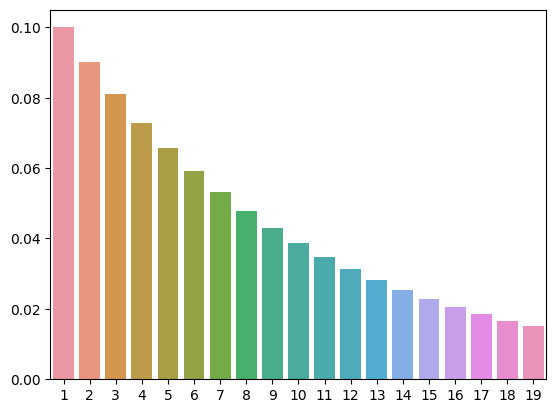

In [ ]:
sns.barplot(x=x_vals, y=probs_geom)

<br>
<br>

<font color='purple'>Here, each bar is representing the probability of achieving success (getting heads) in a specific number of trials</font>.  

Since p is 0.1, the probability of success is relatively low.  

### <font color='blue'>**Geometric Distribution Mean (Expected Value)**</font>  

In a geometric distribution, the mean (or expectation) is <font color='purple'>the average number of attempts needed to achieve success in a series of trials</font>.   


**Imagine a scenario:**   

```
You are flipping a fair coin repeatedly until you get heads for the first time.
You're interested in finding out,
on average, how many times you need to flip the coin before you get that first heads.
```  

This is where the geometric distribution comes into play.  

<br>  

The mean (or expectation) represents the average number of trials (coin flips, in this case) it takes to achieve the desired outcome (getting heads).   

To calculate the mean, you can use the following formula:  

- Mean $(μ)$ = $\Large \frac{1}{Probability \ of \ Success}$  

- Or, **$E[X] = 1/p$**  

<br>

In this case, <font color='purple'>the "Probability of Success" is the probability of getting heads on a single coin flip, which is $1/2$</font>.  

- So, for our example:

  **Mean $(μ) = \frac{1}{1/2} = 2$**  

This means, <font color='purple'>on average, you would need to flip the coin two times before you get heads for the first time</font>.

**Note:**  

- Keep in mind that this is just an average, and in reality, you might get heads on your first flip or after several more flips.


## <font color='blue'>**Example on geometric distribution**</font>

```
Suppose we throw a dice till the first time we get 6.
(a) What is the probability that we have to throw 4 times?  
(b) What is the expected number of throws to get the first 6?  
```

**Solution:**  

First, let's define the probabilities of success and failure  

- P(s) = 1/6  
- P(f) = 1 - P(s) = 5/6  

> (<font color='purple'>a) Probability that we have to throw 4 times</font>.

This means, what is the probability that we will obtain 6 on 4th try?.  

In other words, <font color='purple'>we failed on first 3 tries and got success on 4th try</font>.

By using the geometric distribution formula,  

- <font color='purple'>$P(X=4) = (5/6)^3 * (1/6)$</font>    

  = $0.0964$  

We can implement this in python using **geom.pmf()** function.  






In [ ]:
# probability that we have to throw 4 times is

# k = no. of trials and p = success rate
prob = geom.pmf(k=4, p=1/6)

print("Probability that we have to throw 4 times to obtain 6 is ", prob)

Probability that we have to throw 4 times to obtain 6 is  0.09645061728395063


Let's solve the second question:  

> <font color='purple'>(b) Expected number of throws to get the first 6?</font>  

The expected number of throws can be calculated using this formula,  

- **E[X] = 1/p**

So, the expected number of throws to get the first 6 is:  

- $E[X] = \frac{1}{1/6} = 6$  

<font color='orange'>**Conclusion**</font>  

On average, you would need to throw the die 6 times to get the first 6.  





## <font color='blue'>**Example on geometric mean**</font>

```
Suppose you are playing a game where success rate of winning a prize is 0.7.  
(a) What is the probability of winning a prize on 4th attempt?  
(b) What is the probability that you don't win in 2 attempts?  
(c) What is the expected number of trials to get the first success?

```  

**Solution:**  

Given,

p = 0.7  

Let's use geom function to answer questions

In [ ]:
# (a) the probability of winning a prize on 4th attempt

prob = geom.pmf(k=4, p=0.7)
print("the probability of winning a prize on 4th attempt is ", prob)

the probability of winning a prize on 4th attempt is  0.018900000000000007


> <font color='purple'>(b) The probability that you don't win in 2 attempts?</font>  

To find the probability of not winning in 2 attempts, we <font color='purple'>need to calculate probability of needing more than 2 attempts.</font>  

- <font color='purple'>It may take 3 attempts, 4 attempts, 5 attempts or even more.</font> Means, **$P[X>2]$**

- We need to **calculate the cumulative probability** of all this attempts  


By doing,   

**Total probability - (probability of 1st attempt + probability of 2nd attempt)**,  

we will get cumulative probability of all the attempts other than 1 and 2.   

<br>  

Now using **geom.cdf** we can calculate the cumulative probability of first 2 events then subtract it from 1

In [ ]:
# (b) the probability that you don't win in 2 attempts

# Use the cumulative distribution function (CDF) to find the probability of not winning in 2 attempts
prob = geom.cdf(k=2, p=0.7)

not_winning_prob = 1 - prob
print("the probability that you don't win in 2 attempts is ", not_winning_prob)

the probability that you don't win in 2 attempts is  0.09000000000000008


In [ ]:
# (c) the expected number of trials to get the first success will be E[X] = 1/p

expected = 1/0.7
print("the expected number of trials to get the first success is ", expected)

the expected number of trials to get the first success is  1.4285714285714286
